<a href="https://colab.research.google.com/github/solnarux/MetNumUN2023II/blob/main/Lab2/eslopezb_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U fortran-magic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.9 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: unhashable type: 'slice'

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 36 µs, sys: 0 ns, total: 36 µs
Wall time: 40.1 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.150
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4400.30
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    a_l = len(A[0])
    b_l = len(B)
    if(a_l!=b_l):
       print("Error en tamaño de matrices")
    else:
      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(A[0])):
                  out[i][j] += A[i][k] * B[k][j]
      return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
%%time
matmul(a,b)

Error en tamaño de matrices
CPU times: user 636 µs, sys: 0 ns, total: 636 µs
Wall time: 570 µs


**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    # Condition len(A[0]) == len(B)
    if len(A[0]) == len(B):
      rows_out = len(A)
      cols_out = len(B[0])
      out = [[0 for col in range(cols_out)] for row in range(rows_out)]

      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(A[0])):
                  out[i][j] += A[i][k] * B[k][j]
    else:
      print("No se puede realizar la multiplicación")
      return
    return out

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
%%time
matmul(a, b)

No se puede realizar la multiplicación
CPU times: user 1.07 ms, sys: 1 µs, total: 1.07 ms
Wall time: 1.11 ms


**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
A = [[1, 13, 5, 1],
     [5, 3, 35, 3],
     [5, 5, 55, 6],
     [1, 7, 75, 8]]

B = [[32, 4, 7, 11],
     [11, 14, 18, 11],
     [24, 17, 31, 34],
     [83, 66, 19, 37]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
%%time
matmul(A, B)

CPU times: user 68 µs, sys: 1e+03 ns, total: 69 µs
Wall time: 75.1 µs


[[378, 337, 415, 361],
 [1282, 855, 1231, 1389],
 [2033, 1421, 1944, 2202],
 [2573, 1905, 2610, 2934]]

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

0.32049770501944025

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.5935349272299604, 0.052029518916923534, 0.9237320352669387],
 [0.5034057655264963, 0.09462146800424676, 0.8784698393748127]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
%%time
import time
rand_a = random_matrix(600, 100)
rand_b = random_matrix(100, 600)

avg = 0

for i in range(10):
  t_inicio = time.process_time()
  matmul(rand_a, rand_b)
  t_fin = time.process_time()
  delta = t_fin-t_inicio
  print("Run", i+1, delta)
  avg += delta

avg = avg/10
print(avg)


Run 1 10.217929250999987
Run 2 11.223983678000025
Run 3 9.812862123000002
Run 4 8.584967207999966
Run 5 9.811489671000004
Run 6 9.848180375000027
Run 7 9.776829858999974
Run 8 8.637939501000005
Run 9 9.908984676999921
Run 10 9.799597626000036
9.762276396899995
CPU times: user 1min 37s, sys: 241 ms, total: 1min 37s
Wall time: 1min 38s


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
import pandas as pd

lang_dict = {'Language': ['Python'],
             'average execution time': [avg]}

avg_dataframe = pd.DataFrame(lang_dict)
display(avg_dataframe)

,Language,average execution time
0,Python,9.762276


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
import numpy as np

w = np.array(rand_a)
z = np.array(rand_b)

avg = 0
for i in range(10):
  t_inicio = time.process_time()
  E = w@z
  t_fin = time.process_time()
  delta = t_fin-t_inicio
  avg += delta

avg = avg/10
avg_dataframe.loc[len(avg_dataframe.index)] = ['Numpy', avg]
display(avg_dataframe)

,Language,average execution time
0,Python,9.762276
1,Numpy,0.005641


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 12.4 ms, sys: 981 µs, total: 13.4 ms
Wall time: 15.9 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 211 µs, sys: 0 ns, total: 211 µs
Wall time: 219 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
A = [[-45, 10],
    [5, 6]]

B = [[2, 3],
     [9, 12]]


**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran

subroutine matmul_f(A, B, out)
    implicit none
    real, dimension(2,2), intent(in) :: A,B
    real, dimension(2,2), intent(out) :: out
    integer :: i,j,k

    do i = 1,2
        do j = 1,2
            out(i,j) = 0.0
            do k = 1,2
                out(i,j) = out(i,j) + A(i,k) * B(k,j)
            end do
        end do
    end do

end subroutine matmul_f

The extension _fortran_magic_ca0996eba84c90c3f5d3c420f88c90e3 is already loaded. To reload it, use:
  %fortran_config --clean-cache


**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
%%time
A = np.array(A)
B = np.array(B)

print(matmul_f(A, B))

[[  0. -15.]
 [ 64.  87.]]
CPU times: user 551 µs, sys: 9 µs, total: 560 µs
Wall time: 571 µs


**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran

subroutine matmul_f2(A, B, out)
    implicit none
    real, dimension(600,100), intent(in) :: A
    real, dimension(100,600), intent(in) :: B
    real, dimension(600,600), intent(out) :: out
    integer :: i,j,k

    do i = 1,600
        do j = 1,600
            out(i,j) = 0.0
            do k = 1,100
                out(i,j) = out(i,j) + A(i,k) * B(k,j)
            end do
        end do
    end do

end subroutine matmul_f2

The extension _fortran_magic_80787322524e24b822f98d5505735055 is already loaded. To reload it, use:
  %fortran_config --clean-cache


**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
%%time
# Matrices con numeros aleatorios
# 600 x 100
rand_a = random_matrix(600, 100)
A = np.array(rand_a)
# 100 x 600
rand_b = random_matrix(100, 600)
B = np.array(rand_b)

matmul_f2(A, B)

CPU times: user 75.5 ms, sys: 0 ns, total: 75.5 ms
Wall time: 81.8 ms


array([[22.350918, 24.506952, 21.836088, ..., 25.518368, 21.233648,
        22.877289],
       [24.02048 , 26.21097 , 25.063732, ..., 26.323614, 21.072432,
        22.118607],
       [24.64148 , 24.961006, 22.324732, ..., 25.14418 , 20.767517,
        23.197157],
       ...,
       [22.695576, 25.270481, 24.006443, ..., 24.926296, 22.200089,
        23.6412  ],
       [26.023703, 28.4974  , 26.090088, ..., 29.534384, 25.272785,
        24.719822],
       [25.9796  , 26.621033, 24.476116, ..., 26.170555, 22.749514,
        23.933765]], dtype=float32)

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
avg = 0
# Average execution time running 10 times
for i in range(10):
  inicio = time.process_time()
  matmul_f2(A, B)
  fin = time.process_time()
  # Tiempo por cada vez que se multiplica
  delta = fin-inicio
  avg += delta

avg = avg/10
#promedio de las 10 ejecuciones
avg_dataframe.loc[len(avg_dataframe.index)] = ['Fortran Magic', avg]
display(avg_dataframe)

,Language,average execution time
0,Python,9.762276
1,Numpy,0.005641
2,Fortran Magic,0.045074


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%fortran

subroutine matmul_ten(A, B, out)
    implicit none
    real, dimension(600,100), intent(in) :: A
    real, dimension(100,600), intent(in) :: B
    real, dimension(600,600), intent(out) :: out
    integer :: i,j,k,l

    do l = 1, 10
      do i = 1,600
          do j = 1,600
              out(i,j) = 0.0
              do k = 1,100
                  out(i,j) = out(i,j) + A(i,k) * B(k,j)
              end do
          end do
      end do
    end do
end subroutine matmul_ten

The extension _fortran_magic_088d5e02fe5deb1265af4774e671dcc0 is already loaded. To reload it, use:
  %fortran_config --clean-cache


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%time
rand_a = random_matrix(600, 100)
A = np.array(rand_a)

rand_b = random_matrix(100, 600)
B = np.array(rand_b)

matmul_ten(A, B)

CPU times: user 483 ms, sys: 3 ms, total: 486 ms
Wall time: 491 ms


array([[26.299334, 27.805202, 30.396042, ..., 25.653202, 27.451809,
        26.03452 ],
       [24.272272, 27.068304, 28.781326, ..., 25.853163, 25.425827,
        24.931992],
       [24.03872 , 26.010242, 29.177788, ..., 24.565996, 26.346472,
        23.217846],
       ...,
       [23.931995, 24.228897, 27.147606, ..., 23.89993 , 24.062227,
        24.366365],
       [24.08847 , 25.752018, 27.499323, ..., 24.51794 , 25.519503,
        22.455063],
       [24.97931 , 25.145939, 26.286299, ..., 22.313717, 24.247862,
        21.855165]], dtype=float32)

**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
avg = 0
# Average execution time running 10 times
for i in range(10):
  inicio = time.process_time()
  matmul_ten(A, B)
  fin = time.process_time()
  # Tiempo por cada vez que se multiplica
  delta = fin-inicio
  avg += delta

avg = avg/10
#promedio de las 10 ejecuciones
avg_dataframe.loc[len(avg_dataframe.index)] = ['Fortran', avg]
display(avg_dataframe)

,Language,average execution time
0,Python,9.762276
1,Numpy,0.005641
2,Fortran Magic,0.045074
3,Fortran,0.452227


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matmul.c
#include <stdlib.h>
#include <stdio.h>

int main() {
	unsigned short i, j, k;
  int A[600][100];
  int B[100][600];
  int Out[600][600];

    for(i = 0; i < 600;i++) {
    	for(j = 0; j < 100;j++) {
    		A[i][j]=rand()%100;
    	}
    }
    for(i = 0; i < 100;i++) {
    	for(j = 0; j < 600;j++) {
    		B[i][j]=rand()%100;
    	}
    }

    for(i=0;i<600;i++)
    {
        for(j=0;j<600;j++)
        {
            Out[i][j]=0;
            for(k=0;k<600;k++)
            {
                Out[i][j]+=A[i][k]*B[k][j];
            }
        }
        printf("\n");
    }

  return 0;
}

Writing matmul.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%time
!gcc matmul.c -o matmul
!./matmul

**My own example 21 - Adding c average execution time to the data frame**

In [3]:
inicio = time.process_time()
!gcc matmul.c -o matmul
!./matmul
fin = time.process_time()
delta = fin-inicio

avg_dataframe.loc[len(avg_dataframe.index)] = ['C', delta]
display(avg_dataframe)

NameError: ignored

**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matmull.cc

#include <stdlib.h>
#include <iostream>
#include <time.h>

using namespace std;

void mult(int mat1[600][100],int mat2[100][600]){
    int i, j, k,c=0;
    while(c>10){
      for (i = 0; i < 600; i++) {
        for (j = 0; j < 600; j++) {
            mat1[i][j] = 0;
            for (k = 0; k < 100; k++)
                mat1[i][j] += mat1[i][k] * mat2[k][j];
        }
        c++;
      }
    }
    for (i = 0; i < 600; i++)
        {
            for (j = 0; j < 100; j++)
            {
                cout<<"\t"<<mat1[i][j];
            }
            cout<<"\n\n";
        }
}

int main(void) {
  int A[600][100];
  int B[100][600];

  for (int i = 0; i < 600; i++){
    for (int j = 0; j < 100; j++){
      A[i][j] = rand()%15;
    }
  }

  for (int i = 0; i < 100; i++){
    for (int j = 0; j < 600; j++){
      B[i][j] = rand()%15;
    }
  }
	mult(A, B);
	return 0;
}



Overwriting matmull.cc


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%time
!g++ matmull.cc -o matmull
!./matmull

	13	1	12	10	8	10	1	12	9	1	2	7	5	4	8	1	0	6	7	1	11	8	12	9	2	5	2	13	7	10	14	12	12	3	14	12	13	1	1	7	9	3	6	14	14	7	8	14	5	0	8	1	1	5	11	3	2	5	1	1	0	0	14	12	11	5	1	9	13	2	9	0	12	0	14	12	14	14	3	5	7	3	6	8	8	9	3	11	14	4	12	0	11	3	4	7	1	6	9	14

	0	10	14	13	2	6	2	2	12	12	7	11	1	5	11	1	0	14	4	14	10	9	6	7	12	11	6	5	9	7	12	1	2	3	6	5	1	8	14	14	13	6	2	14	3	14	0	3	13	5	10	9	6	8	8	10	11	6	1	5	14	13	14	8	1	5	13	10	14	4	9	4	2	11	3	6	2	10	9	1	7	11	2	13	5	2	9	1	8	10	14	7	0	13	8	8	3	6	3	9

	11	4	13	13	8	8	11	10	4	13	3	3	9	12	2	6	14	3	0	8	5	14	7	5	4	0	5	14	14	1	9	2	12	14	7	12	0	4	8	11	2	3	14	3	1	8	10	7	11	10	0	1	1	0	13	5	0	11	4	6	12	5	8	1	12	8	14	12	12	14	0	6	2	14	9	10	8	11	3	11	6	10	13	14	10	3	4	11	14	1	9	3	13	3	5	10	11	11	14	0

	10	14	6	12	6	7	0	6	4	3	2	2	13	7	9	9	11	5	12	2	6	6	13	12	1	10	14	4	6	14	4	1	5	2	5	3	2	5	9	13	0	4	7	14	11	1	0	14	7	12	2	5	10	0	2	4	10	2	8	8	8	5	9	5	14	6	9	1	12	10	14	4	14	14	3	11	0	10	10	7	14	4	13	10	11	7	14	13	1	14	6	9	4	7	7	11	14	1	12	3

	3	4	7	3	3	3	6	3	13	8	3	13	13	8	0	9	7	6	8	9	5

**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
inicio = time.process_time()
!g++ matmull.cc -o matmull
!./matmull
fin = time.process_time()
delta = fin-inicio

avg_dataframe.loc[len(avg_dataframe.index)] = ['C++', delta]
display(avg_dataframe)

	13	1	12	10	8	10	1	12	9	1	2	7	5	4	8	1	0	6	7	1	11	8	12	9	2	5	2	13	7	10	14	12	12	3	14	12	13	1	1	7	9	3	6	14	14	7	8	14	5	0	8	1	1	5	11	3	2	5	1	1	0	0	14	12	11	5	1	9	13	2	9	0	12	0	14	12	14	14	3	5	7	3	6	8	8	9	3	11	14	4	12	0	11	3	4	7	1	6	9	14

	0	10	14	13	2	6	2	2	12	12	7	11	1	5	11	1	0	14	4	14	10	9	6	7	12	11	6	5	9	7	12	1	2	3	6	5	1	8	14	14	13	6	2	14	3	14	0	3	13	5	10	9	6	8	8	10	11	6	1	5	14	13	14	8	1	5	13	10	14	4	9	4	2	11	3	6	2	10	9	1	7	11	2	13	5	2	9	1	8	10	14	7	0	13	8	8	3	6	3	9

	11	4	13	13	8	8	11	10	4	13	3	3	9	12	2	6	14	3	0	8	5	14	7	5	4	0	5	14	14	1	9	2	12	14	7	12	0	4	8	11	2	3	14	3	1	8	10	7	11	10	0	1	1	0	13	5	0	11	4	6	12	5	8	1	12	8	14	12	12	14	0	6	2	14	9	10	8	11	3	11	6	10	13	14	10	3	4	11	14	1	9	3	13	3	5	10	11	11	14	0

	10	14	6	12	6	7	0	6	4	3	2	2	13	7	9	9	11	5	12	2	6	6	13	12	1	10	14	4	6	14	4	1	5	2	5	3	2	5	9	13	0	4	7	14	11	1	0	14	7	12	2	5	10	0	2	4	10	2	8	8	8	5	9	5	14	6	9	1	12	10	14	4	14	14	3	11	0	10	10	7	14	4	13	10	11	7	14	13	1	14	6	9	4	7	7	11	14	1	12	3

	3	4	7	3	3	3	6	3	13	8	3	13	13	8	0	9	7	6	8	9	5

,Language,average execution time
0,Python,9.762276
1,Numpy,0.005641
2,Fortran Magic,0.045074
3,Fortran,0.452227
4,C,0.761872
5,C++,0.037676


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%time
%%writefile Main.java
public class Main {
    public static void main(String[] args) {
    int n = 0;
	  int [][] A = new int[600][100];
	  int [][] B = new int[100][600];
	  int x = 0;
	  int v = 0;
	  int[][] Out = new int[A.length][B[0].length];

		for (x = 0; x < (A.length); x++) {
			  for (int y = 0; y < (A[x].length); y++) {
			    A[x][y] = (int) (Math.random()*9+1);
			  }
			}

		for (x=0; x < (B.length); x++) {
			  for (int y=0; y < (B[x].length); y++) {
			    B[x][y] = (int) (Math.random()*9+1);
			  }
			}

	while(n < 10) {
		for (int i=0; i < B[0].length; i++) {

			 for (int j = 0; j < A.length; j++) {
				 for(int k = 0;k < B.length; k++) {
					 v = v + A[j][k]*B[k][i];
				 }
				 Out[j][i] = v;
				 v = 0;
			  }

			}

		n++;

	}
}
}

Overwriting Main.java
CPU times: user 557 µs, sys: 1e+03 µs, total: 1.56 ms
Wall time: 3.74 ms


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%time
!javac Main.java
!java Main

CPU times: user 18.1 ms, sys: 3.92 ms, total: 22 ms
Wall time: 1.62 s


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
inicio = time.process_time()
!javac Main.java
!java Main
fin = time.process_time()
delta = fin-inicio

avg_dataframe.loc[len(avg_dataframe.index)] = ['Java', delta]
display(avg_dataframe)

,Language,average execution time
0,Python,9.762276
1,Numpy,0.005641
2,Fortran Magic,0.045074
3,Fortran,0.452227
4,C,0.761872
5,C++,0.037676
6,Java,0.023542


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:

%%time
%%writefile tmp.js

let m1 = new Array(600);
let m2 =new Array(100);

for (i=0; i<m1.length;i++){
    m1[i] = new Array(100);
}
    for (u=0; u < m1.length; u++) {
        for (w=0; w < m1[u].length; w++) {
            m1[u][w]= Math.random();
        }
    }

for (a=0; a<m2.length;a++){
    m2[a] = new Array(600);
}
    for (r=0; r< m2.length; r++) {
        for (c=0; c < m2[r].length; c++) {
            m2[r][c]= Math.random();
        }
    }





let multiplicacion = new Array(m1.length);
for(e=0;e<10;e++){
for (k=0; k<multiplicacion.length;k++){
    multiplicacion[k] = new Array(m2[0].length).fill(0);

    for (n=0; n < multiplicacion.length; n++) {
        for (l=0; l < multiplicacion[n].length; l++) {
            for (d=0; d<m1[0].length; d++) {
                multiplicacion [n][l] = multiplicacion [n][l] + m1[n][d]*m2[d][l];
            }
        }
    }
}
}


Overwriting tmp.js
CPU times: user 1.4 ms, sys: 0 ns, total: 1.4 ms
Wall time: 1.46 ms


In [ ]:
%%writefile multmat.js

const ROWS_A = 600;
const COLS_A = 100;
const ROWS_B = 100;
const COLS_B = 600;

let A = new Array(ROWS_A);
let B = new Array(ROWS_B);
let result = new Array(ROWS_A);
for (let i = 0; i < ROWS_A; i++) {
    A[i] = new Array(COLS_A);
    result[i] = new Array(COLS_B);
    for (let j = 0; j < COLS_A; j++) {
        A[i][j] = i * j;
    }
}
for (let i = 0; i < ROWS_B; i++) {
    B[i] = new Array(COLS_B);
    for (let j = 0; j < COLS_B; j++) {
        B[i][j] = i + j;
    }
}

for (n=0; n < 10; n++){
  for (let i = 0; i < ROWS_A; i++) {
      for (let j = 0; j < COLS_B; j++) {
          result[i][j] = 0;
          for (let k = 0; k < COLS_A; k++) {
              result[i][j] += A[i][k] * B[k][j];
          }
      }
  }
}

Overwriting multmat.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%time
!node multmat.js

CPU times: user 36.5 ms, sys: 1.03 ms, total: 37.5 ms
Wall time: 3.22 s


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
inicio = time.process_time()
!node multmat.js
fin = time.process_time()
delta = fin-inicio

avg_dataframe.loc[len(avg_dataframe.index)] = ['Javascript', delta]
display(avg_dataframe)

,Language,average execution time
0,Python,9.762276
1,Numpy,0.005641
2,Fortran Magic,0.045074
3,Fortran,0.452227
4,C,0.761872
5,C++,0.037676
6,Java,0.023542
7,Javascript,0.051299


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
minimun = avg_dataframe["average execution time"].min()
print(minimun)

0.005640980399994078


**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
avg_dataframe["Speed Factor"] = avg_dataframe["average execution time"] / minimun
display(avg_dataframe)

,Language,average execution time,Speed Factor
1,Numpy,0.005641,1.000000
6,Java,0.023542,4.173402
5,C++,0.037676,6.678978
2,Fortran Magic,0.045074,7.990437
7,Javascript,0.051299,9.093909
3,Fortran,0.452227,80.168183
4,C,0.761872,135.060259
0,Python,9.762276,1730.599241


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
avg_dataframe = avg_dataframe.sort_values(by=['average execution time'])
display(avg_dataframe)

,Language,average execution time
1,Numpy,0.005641
6,Java,0.023542
5,C++,0.037676
2,Fortran Magic,0.045074
7,Javascript,0.051299
3,Fortran,0.452227
4,C,0.761872
0,Python,9.762276


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 386 µs, sys: 6 µs, total: 392 µs
Wall time: 403 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 705 µs, sys: 4.03 ms, total: 4.73 ms
Wall time: 5.12 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 314 µs, sys: 0 ns, total: 314 µs
Wall time: 355 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

In [ ]:
# Binary operators.
data * data

In [ ]:
# Unary functions.
np.sqrt(data)

In [ ]:
# Comparison operations
(data % 3) == 0

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

In [ ]:
sines[:3]  # First three elements

In [ ]:
sines[5:]  # Elements from 5 on.

In [ ]:
sines[::2]  # Every other element.

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

In [ ]:
unsorted_data[sort_indices]

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

In [ ]:
data[:2, :2]  # First two rows and first two columns.

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

In [ ]:
data.mean()

In [ ]:
data.mean(axis=0)

In [ ]:
data.mean(axis=1)

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

In [ ]:
row + column

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

In [ ]:
# ... or by label.
s.loc['a']

In [ ]:
# Slicing works as expected...
s.iloc[:2]

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

In [ ]:
# As does boolean masking.
s.loc[s > 2]

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

In [ ]:
s + other_s

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
## Run this cell to test it. Get Avocados
!git clone https://github.com/ssanderson/pydata-toolbox.git

Cloning into 'pydata-toolbox'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 88 (delta 22), reused 14 (delta 8), pack-reused 52
Receiving objects: 100% (88/88), 11.87 MiB | 23.29 MiB/s, done.
Resolving deltas: 100% (35/35), done.


In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

/content/demos/avocados.py:55: FutureWarning: The default value of regex will change from True to False in a future version.
  frame['Region'] = frame['Region'].str.replace(' U.S.', '')


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

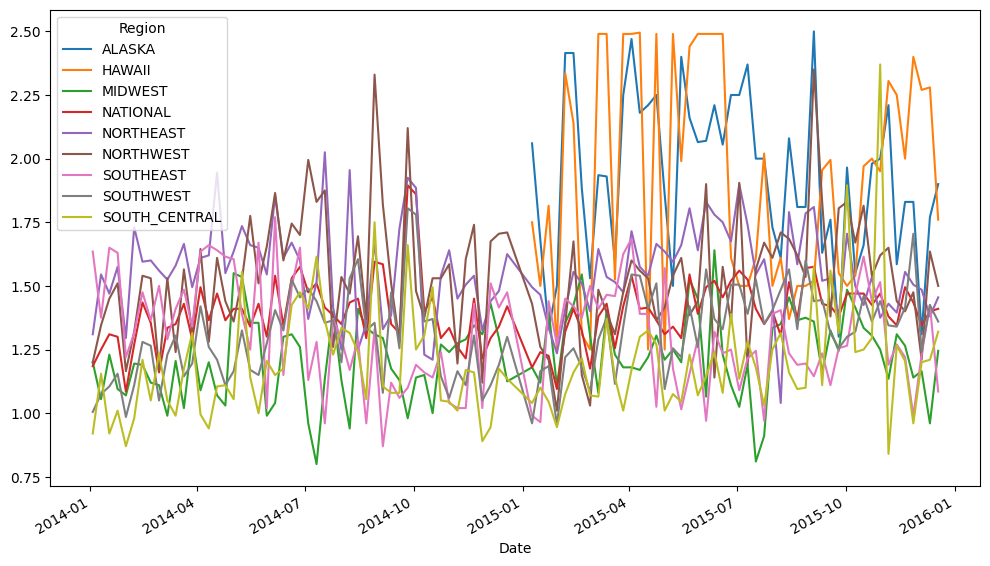

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

**My own example 34**

In [ ]:
import pandas as pd

since = pd.read_csv('sample_data/sincelejo.csv')
since.head()

,RAZON_SOCIAL_ESTABLECIMIENTO,SUB_CATEGORIA,HABITACIONES,CAMAS,NUM_EMP
0,HOTEL PANORAMA,HOTEL,46,70,6
1,HOTEL PANAMERICANO,HOTEL,30,40,5
2,TURISMO DEL MORROSQUILLO LTDA.,AGENCIA DE VIAJES MAYORISTAS,0,0,2
3,VIAJES Y TURISMO MAR CARIBE LTDA.,AGENCIA DE VIAJES Y DE TURISMO,0,0,2
4,HOTEL BOSTON.,HOTEL,51,71,2


In [ ]:
since.dtypes

RAZON_SOCIAL_ESTABLECIMIENTO    object
SUB_CATEGORIA                   object
HABITACIONES                     int64
CAMAS                            int64
NUM_EMP                          int64
dtype: object

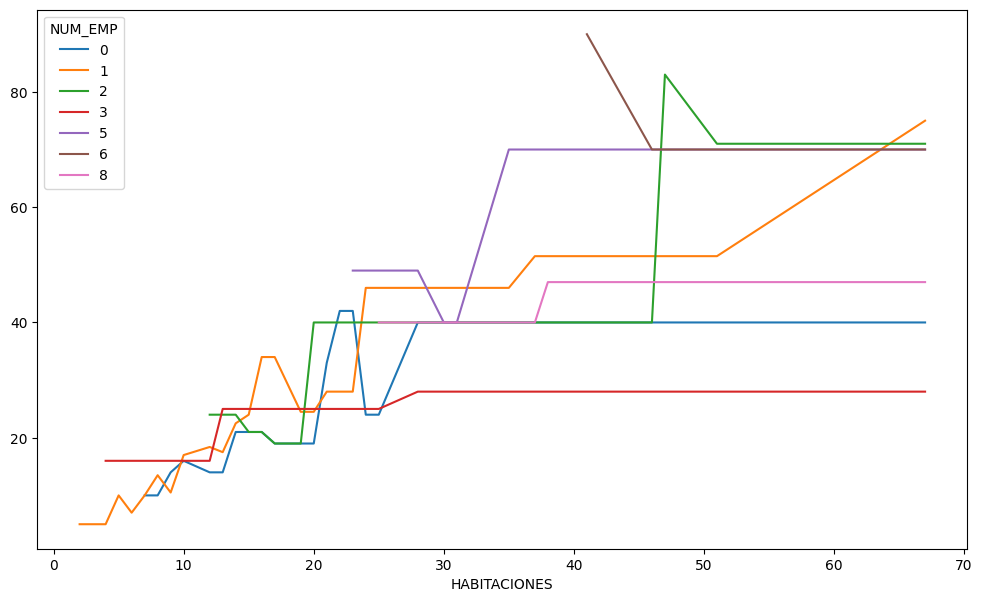

In [ ]:
camas = since[since.SUB_CATEGORIA == 'HOTEL']
camas.groupby(['HABITACIONES', 'NUM_EMP'])['CAMAS'].mean().unstack().ffill().plot();

In [ ]:
corr_sincelejo = since.groupby('SUB_CATEGORIA')[['HABITACIONES', 'CAMAS']].corr()
coeff = corr_sincelejo.unstack(level=1)['HABITACIONES']['CAMAS']
corr_sincelejo

HABITACIONES     CAMAS
SUB_CATEGORIA                                                               
AGENCIA DE VIAJES MAYORISTAS            HABITACIONES           NaN       NaN
                                        CAMAS                  NaN       NaN
AGENCIA DE VIAJES OPERADORAS            HABITACIONES           NaN       NaN
                                        CAMAS                  NaN       NaN
AGENCIA DE VIAJES Y DE TURISMO          HABITACIONES           NaN       NaN
                                        CAMAS                  NaN       NaN
ALBERGUE                                HABITACIONES           NaN       NaN
                                        CAMAS                  NaN       NaN
APARTAHOTEL                             HABITACIONES      1.000000  0.989238
                                        CAMAS             0.989238  1.000000
APARTAMENTO TURÍSTICO                   HABITACIONES           NaN       NaN
                                        CAMAS                  NaN  1.000000
CASA TURÍSTICA                          HABITACIONES      1.000000  0.727607
                                        CAMAS             0.727607  1.000000
CENTRO VACACIONAL                       HABITACIONES           NaN       NaN
                                        CAMAS                  NaN       NaN
FINCA TURISTICA (ALOJAMIENTO RURAL)     HABITACIONES           NaN       NaN
                                        CAMAS                  NaN       NaN
GUIA DE TURISMO                         HABITACIONES           NaN       NaN
                                        CAMAS                  NaN       NaN
HOSTAL                                  HABITACIONES      1.000000  0.913409
                                        CAMAS             0.913409  1.000000
HOTEL                                   HABITACIONES      1.000000  0.910596
                                        CAMAS             0.910596  1.000000
OTRO TIPO DE VIVIENDA TURÍSTICA         HABITACIONES           NaN       NaN
                                        CAMAS                  NaN       NaN
TRANSPORTE TERRESTRE AUTOMOTOR ESPECIAL HABITACIONES           NaN       NaN
                                        CAMAS                  NaN       NaN

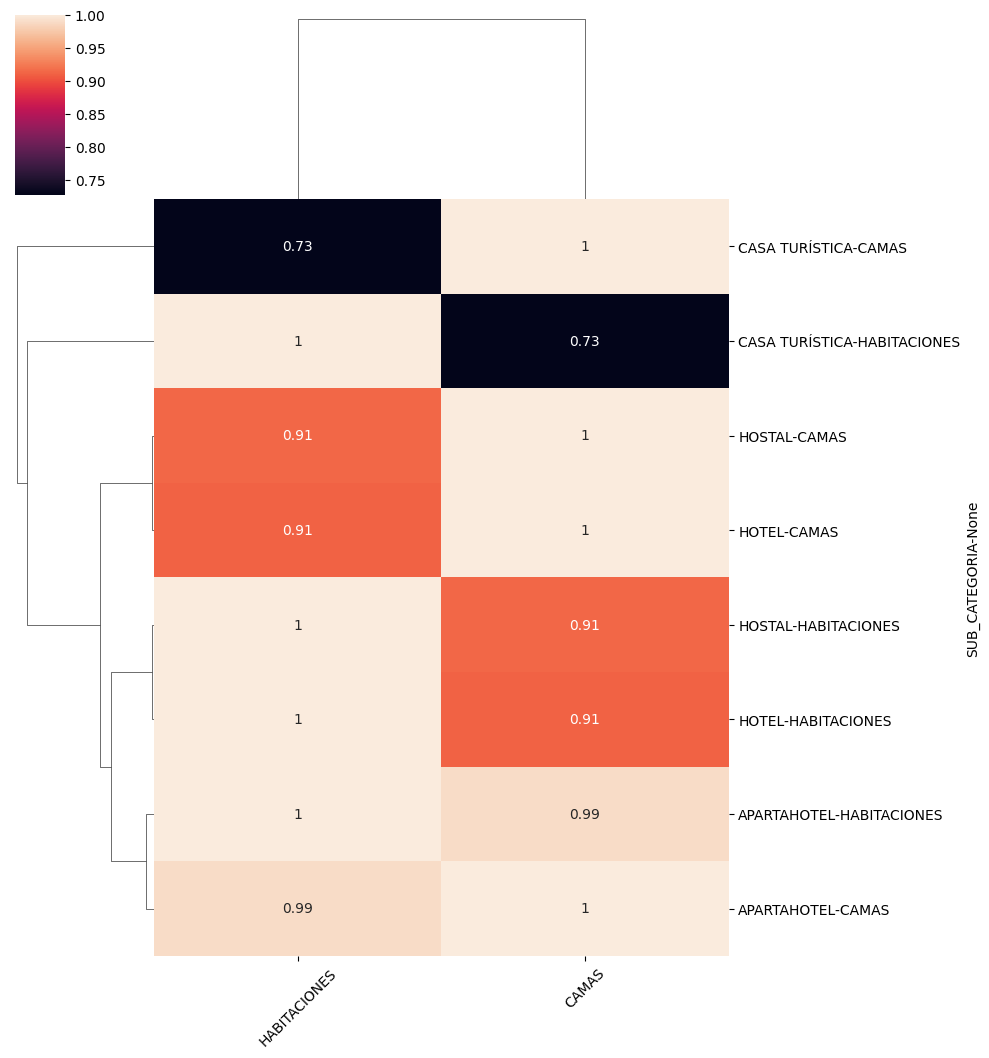

In [ ]:
import seaborn as sns
dataset = corr_sincelejo.dropna(how='any')
grid = sns.clustermap(dataset, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!